In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical
from sklearn.svm import SVC
from keras.utils import to_categorical

In [ ]:
# Veri kümesini yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Verileri yeniden şekillendirme
img_height, img_width, num_channels = 28, 28, 1
x_train = x_train.reshape((-1, img_height, img_width, num_channels))
x_test = x_test.reshape((-1, img_height, img_width, num_channels))
#Burada veri setindeki görüntü boyutunu yeniden şeklillendirerek 4 boyutlu tensörlere dönüştürüyoruz.
#Veri setindeki her görüntü 28x28 boyutların da tek kanallı yani gridir.

In [ ]:
# Veri ön işleme (normalizasyon)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# CNN modelini oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# CNN Modelini derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# CNN Modelini eğitme
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 48s 4ms/step - loss: 0.1264 - accuracy: 0.9620 - val_loss: 0.0531 - val_accuracy: 0.9824
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0416 - val_accuracy: 0.9857
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0363 - val_accuracy: 0.9891
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0302 - val_accuracy: 0.9910
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0331 - val_accuracy: 0.9903
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0319 - va

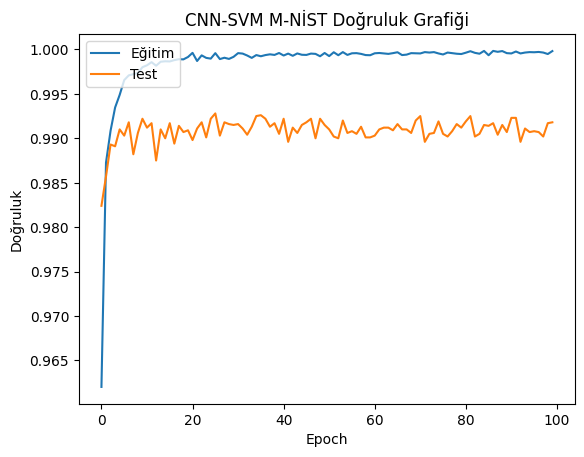

In [ ]:
# Accuracy grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN-SVM M-NİST Doğruluk Grafiği')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

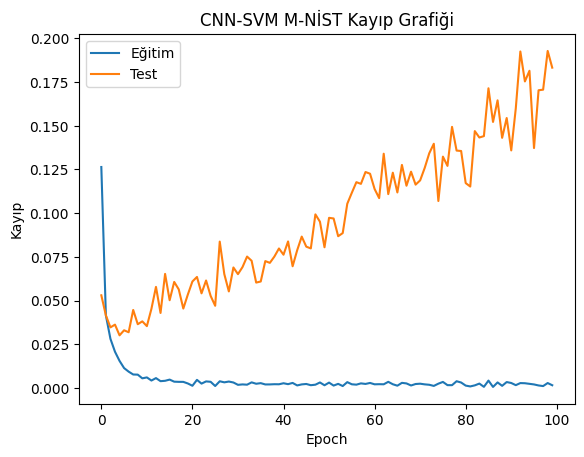

In [ ]:
# Loss grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN-SVM M-NİST Kayıp Grafiği')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

In [ ]:
# CNN modelinden özellik çıkarma
train_features = model.predict(x_train)
test_features = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# SVM modelini oluşturma ve eğitme
svm_model = SVC()
svm_model.fit(train_features, y_train)

SVC()

In [ ]:
# SVM ile tahmin yapma
svm_predictions = svm_model.predict(test_features)

In [ ]:
# Hibrit modelin performansını değerlendirme
train_predictions = svm_model.predict(train_features)
test_predictions = svm_model.predict(test_features)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Eğitim verisi doğruluğu:", train_accuracy)
print("Test verisi doğruluğu:", test_accuracy)

Eğitim verisi doğruluğu: 0.99995
Test verisi doğruluğu: 0.9918


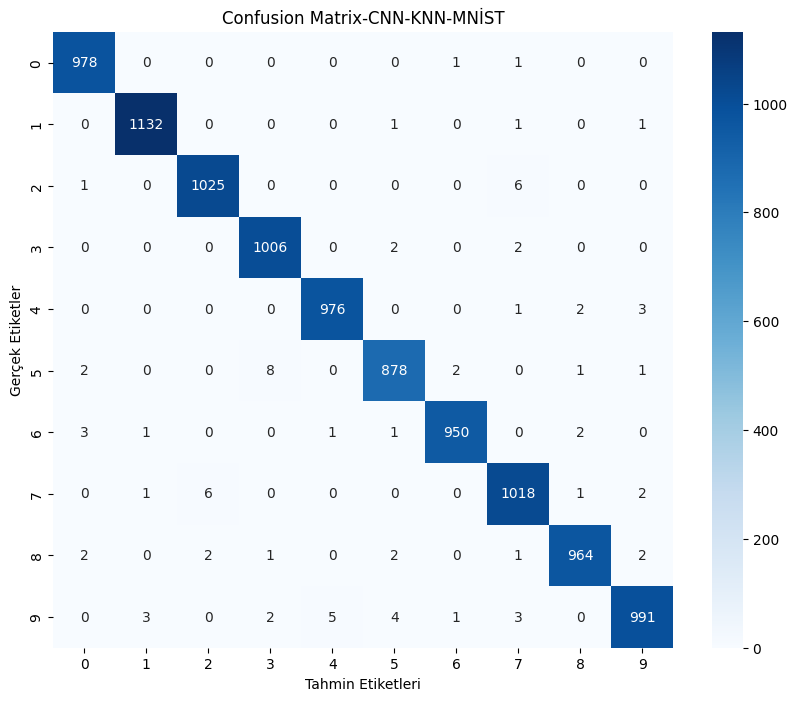

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix-CNN-KNN-MNİST')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()

In [ ]:
# Sınıflandırma raporu
classification_rep = classification_report(y_test, svm_predictions)
print('Sınıflandırma Raporu:\n', classification_rep)

# Recall, precision ve f1-score değerlerini elde etme
report_lines = classification_rep.split('\n')
for line in report_lines[2:-5]:
    line_data = line.split()
    if len(line_data) >= 4:
        class_label = int(line_data[0])
        precision = float(line_data[1])
        recall = float(line_data[2])
        f1 = float(line_data[3])
        print('Sınıf:', class_label)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1-score:', f1)
        print('----------------------')

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Sınıf: 0
Precision: 0.99
Recall: 1.0
F1-score: 0.99
----------------------
Sınıf: 1
Precision: 1.0
Recall: 1.0
F1-score: 1.0
----------------------
Sınıf: 2
Precision: 0.99
Recall: 0.99
F1-score: 0.99
-----------------

In [ ]:
# Sınıf etiketlerini one-hot encoding yapma
y_train_binary = label_binarize(y_train, classes=np.unique(y_train))
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binary.shape[1]
# Test verileri üzerinde tahminleri elde etme
test_predictions = model.predict(x_test)

# ROC eğrisi ve AUC skoru hesaplama
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Mikro-ortalamalı ROC eğrisi ve AUC skoru hesaplama
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), test_predictions.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Makro-ortalamalı ROC eğrisi ve AUC skoru hesaplama
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Sonuçları yazdırma
print('Mikro-Ortalama AUC Skoru:', roc_auc_micro)
print('Makro-Ortalama AUC Skoru:', roc_auc_macro)


313/313 [==============================] - 1s 2ms/step
Mikro-Ortalama AUC Skoru: 0.99972041
Makro-Ortalama AUC Skoru: 0.9997301651540647


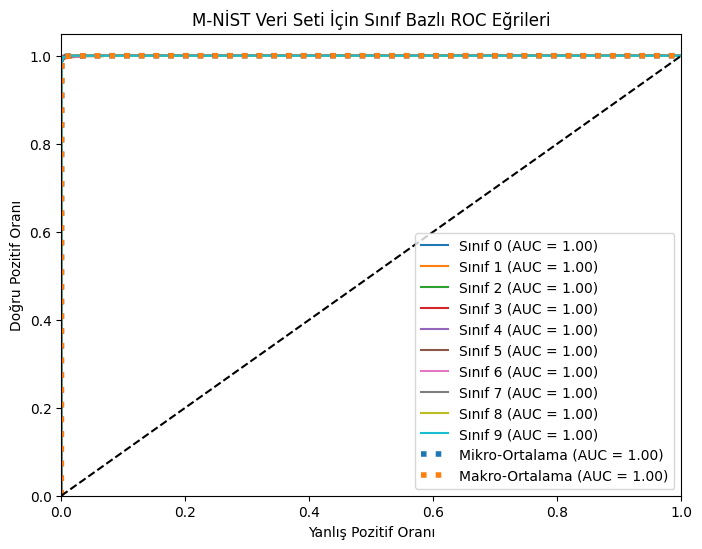

In [ ]:
# ROC eğrilerini çizme
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Sınıf %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Mikro-ortalamalı ROC eğrisini çizme
plt.plot(fpr_micro, tpr_micro, label='Mikro-Ortalama (AUC = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

# Makro-ortalamalı ROC eğrisini çizme
plt.plot(fpr_macro, tpr_macro, label='Makro-Ortalama (AUC = %0.2f)' % roc_auc_macro, linestyle=':', linewidth=4)

# Rastgele tahmin edilen ROC eğrisini çizme
plt.plot([0, 1], [0, 1], 'k--')

# Eksen ve başlık ayarları
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('M-NİST Veri Seti İçin Sınıf Bazlı ROC Eğrileri')
plt.legend(loc="lower right")

# Grafik gösterme
plt.show()